In [1]:
import pandas as pd
import ast

In [2]:
dt = pd.read_csv('properties-cleaned-v1.csv')

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

In [4]:
dt.head(2)

,society,price,sector,pricePerSqft,propertyType,area,bedRooms,bathRooms,additionalRooms,address,floorNum,facing,agePossesion,nearbyLocation,furnishDetails,features,balcony
0,"palam vihar, gurgaon",4.26,sector 1,NaN,house,1773.0,6.0,6.0,not available,"palam vihar, gurgaon",3.0,north,1 to 5 Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'HUDA Sector 23 Market', 'Ram Mandir', 'Metro Hospital and Heart Institute Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Kalyan Hospital Gurgaon', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Axis bank', 'Punjab national bank', 'Oriental bank of commerce', 'Big Cinemas', 'Cafe Coffee Day', 'Pizza Hut', ""Domino's Pizza"", 'Moti Mahal', 'Pind Baluchi', ""McDonald's"", 'Om Sweets', 'Chiranjiv Bharati School', 'Masti ki Pathshala Teach India', 'Swiss Cottage school', 'THE NORTHCAP UNIVERSITY', 'Palam vihar railway station', 'Bijwasan railway station']","['4 Wardrobe', '7 Fan', '1 Exhaust Fan', '8 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Private Garden / Terrace', 'Maintenance Staff', 'Park', 'Natural Light']",3
1,m3m woodshire,1.70,sector 107,8749.36,flat,1943.0,3.0,3.0,not available,"M3M Woodshire Sector 107, Gurgaon",7.0,east,1 to 5 Year Old,"['Signum 107', 'Nora Solomon Medicenter', 'Indira Gandhi International Airport', 'The Shikshiyan School', 'Najafgarh Jheel Bird Sanctuary', 'Skylark Cricket Academy']","['3 Wardrobe', '5 Fan', '3 Geyser', '25 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN


In [5]:
dt['pricePerSqft'].isna().sum()

1920

In [6]:
# filling in the null values of perice per sqft 

dt['pricePerSqft'] = dt['pricePerSqft'].fillna(round((dt['price']*10000000)/dt['area'],2))

In [7]:
dt['pricePerSqft'].isna().sum()

404

# Area

    We will create 3 columns builtup , superbuiltup are carpetarea as we didnt had this data , earlier .

    using this standard assumption based approx data brackets 

    For Flats:

    area -> superbuilt 
    
	•	1 BHK:
		Carpet Area: ~55% of Super Built-up Area.
		Built-up Area: ~70% of Super Built-up Area. 
	•	2 BHK:
		Carpet Area: ~60% of Super Built-up Area.
		Built-up Area: ~75% of Super Built-up Area.
	•	3 BHK:
		Carpet Area: ~65% of Super Built-up Area.
		Built-up Area: ~80% of Super Built-up Area.
	•	4 BHK and above:
		Carpet Area: ~70% of Super Built-up Area.
		Built-up Area: ~85% of Super Built-up Area.

    For Independent Houses:

    area -> builtup 
    
	•	1 BHK:
		Carpet Area: ~70% of Built-up Area.
		Super Built-up Area: ~115% of Built-up Area.
	•	2 BHK:
		Carpet Area: ~75% of Built-up Area.
		Super Built-up Area: ~120% of Built-up Area.
	•	3 BHK:
		Carpet Area: ~80% of Built-up Area.
		Super Built-up Area: ~125% of Built-up Area.
	•	4 BHK and above:
		Carpet Area: ~85% of Built-up Area.
		Super Built-up Area: ~130% of Built-up Area.

In [9]:
temp = dt[['area','bedRooms','propertyType']]
import numpy as np
temp['superbuilt'] = np.nan
temp['builtup'] = np.nan
temp['carpet'] = np.nan

/var/folders/gy/lt_77nr13fs5zj9y4gdv7v4r0000gn/T/ipykernel_2872/3868370454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['superbuilt'] = np.nan
/var/folders/gy/lt_77nr13fs5zj9y4gdv7v4r0000gn/T/ipykernel_2872/3868370454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['builtup'] = np.nan
/var/folders/gy/lt_77nr13fs5zj9y4gdv7v4r0000gn/T/ipykernel_2872/3868370454.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [10]:
def areaTypes(val):
    
    if val['propertyType'] == 'house':
        
        val['builtup'] = val['area']
        
        if val['bedRooms'] == 1:
            val['carpet'] = (val['area']*0.70)
            val['superbuilt'] = (val['area']*1.15)
            
        elif val['bedRooms'] == 2:
            val['carpet'] = (val['area']*0.75)
            val['superbuilt'] = (val['area']*1.20)
            
        elif val['bedRooms'] == 3:
            val['carpet'] = (val['area']*0.80)
            val['superbuilt'] = (val['area']*1.25)
        
        else:
            val['carpet'] = (val['area']*0.85)
            val['superbuilt'] = (val['area']*1.30)
    else:

        val['superbuilt'] = val['area']

        if val['bedRooms'] == 1:
            val['carpet'] = (val['area']*0.55)
            val['builtup'] = (val['area']*0.70)
            
        elif val['bedRooms'] == 2:
            val['carpet'] = (val['area']*0.60)
            val['builtup'] = (val['area']*0.75)
            
        elif val['bedRooms'] == 3:
            val['carpet'] = (val['area']*0.65)
            val['builtup'] = (val['area']*0.80)
        
        else:
            val['carpet'] = (val['area']*0.70)
            val['builtup'] = (val['area']*0.85)
        
    return val

In [11]:
temp = temp.apply(areaTypes,axis=1)

In [12]:
dt.insert(6,'superbuilt',np.nan)
dt.insert(7,'builtup',np.nan)
dt.insert(7,'carpet',np.nan)

In [13]:
dt.loc[temp.index,['superbuilt','builtup','carpet']] = temp[['superbuilt','builtup','carpet']]

In [14]:
dt.head(2)

,society,price,sector,pricePerSqft,propertyType,area,superbuilt,carpet,builtup,bedRooms,bathRooms,additionalRooms,address,floorNum,facing,agePossesion,nearbyLocation,furnishDetails,features,balcony
0,"palam vihar, gurgaon",4.26,sector 1,24027.07,house,1773.0,2304.9,1507.05,1773.0,6.0,6.0,not available,"palam vihar, gurgaon",3.0,north,1 to 5 Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'HUDA Sector 23 Market', 'Ram Mandir', 'Metro Hospital and Heart Institute Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Kalyan Hospital Gurgaon', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Axis bank', 'Punjab national bank', 'Oriental bank of commerce', 'Big Cinemas', 'Cafe Coffee Day', 'Pizza Hut', ""Domino's Pizza"", 'Moti Mahal', 'Pind Baluchi', ""McDonald's"", 'Om Sweets', 'Chiranjiv Bharati School', 'Masti ki Pathshala Teach India', 'Swiss Cottage school', 'THE NORTHCAP UNIVERSITY', 'Palam vihar railway station', 'Bijwasan railway station']","['4 Wardrobe', '7 Fan', '1 Exhaust Fan', '8 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Private Garden / Terrace', 'Maintenance Staff', 'Park', 'Natural Light']",3
1,m3m woodshire,1.70,sector 107,8749.36,flat,1943.0,1943.0,1262.95,1554.4,3.0,3.0,not available,"M3M Woodshire Sector 107, Gurgaon",7.0,east,1 to 5 Year Old,"['Signum 107', 'Nora Solomon Medicenter', 'Indira Gandhi International Airport', 'The Shikshiyan School', 'Najafgarh Jheel Bird Sanctuary', 'Skylark Cricket Academy']","['3 Wardrobe', '5 Fan', '3 Geyser', '25 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN


# additionalRooms

In [16]:
dt['additionalRooms'].value_counts()

additionalRooms
servant room                                     1004
not available                                     775
pooja room,study room,servant room,store room     234
pooja room                                        213
study room                                        189
others                                            178
store room                                        144
study room,servant room                           116
pooja room,servant room                            92
pooja room,study room,servant room,others          66
pooja room,store room,study room,servant room      63
servant room,study room                            60
servant room,pooja room                            60
servant room,store room                            56
pooja room,study room,servant room                 48
pooja room,servant room,store room                 31
servant room,others                                29
pooja room,study room                              29
pooja room,s

# note 
    so we have 5 types of additional rooms 

    pooja 
    study 
    servent 
    other 
    store

    we will create five new columns 

In [18]:
# list of new columns to be created 

cols = ['pooja room', 'servant room' , 'study room' , 'others'  , 'store room']

# populate the new columns based on additionalRoom column

for col in cols:
    dt[col] = dt['additionalRooms'].str.contains(col).astype(int)

In [19]:
dt.head(2)

,society,price,sector,pricePerSqft,propertyType,area,superbuilt,carpet,builtup,bedRooms,bathRooms,additionalRooms,address,floorNum,facing,agePossesion,nearbyLocation,furnishDetails,features,balcony,pooja room,servant room,study room,others,store room
0,"palam vihar, gurgaon",4.26,sector 1,24027.07,house,1773.0,2304.9,1507.05,1773.0,6.0,6.0,not available,"palam vihar, gurgaon",3.0,north,1 to 5 Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'HUDA Sector 23 Market', 'Ram Mandir', 'Metro Hospital and Heart Institute Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Kalyan Hospital Gurgaon', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Axis bank', 'Punjab national bank', 'Oriental bank of commerce', 'Big Cinemas', 'Cafe Coffee Day', 'Pizza Hut', ""Domino's Pizza"", 'Moti Mahal', 'Pind Baluchi', ""McDonald's"", 'Om Sweets', 'Chiranjiv Bharati School', 'Masti ki Pathshala Teach India', 'Swiss Cottage school', 'THE NORTHCAP UNIVERSITY', 'Palam vihar railway station', 'Bijwasan railway station']","['4 Wardrobe', '7 Fan', '1 Exhaust Fan', '8 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Private Garden / Terrace', 'Maintenance Staff', 'Park', 'Natural Light']",3,0,0,0,0,0
1,m3m woodshire,1.70,sector 107,8749.36,flat,1943.0,1943.0,1262.95,1554.4,3.0,3.0,not available,"M3M Woodshire Sector 107, Gurgaon",7.0,east,1 to 5 Year Old,"['Signum 107', 'Nora Solomon Medicenter', 'Indira Gandhi International Airport', 'The Shikshiyan School', 'Najafgarh Jheel Bird Sanctuary', 'Skylark Cricket Academy']","['3 Wardrobe', '5 Fan', '3 Geyser', '25 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,0,0,0,0,0


In [20]:
dt = dt.drop(columns = 'additionalRooms')

In [21]:
dt = dt.drop(columns = 'nearbyLocation') # no need of this column

In [22]:
dt.head(2)

,society,price,sector,pricePerSqft,propertyType,area,superbuilt,carpet,builtup,bedRooms,bathRooms,address,floorNum,facing,agePossesion,furnishDetails,features,balcony,pooja room,servant room,study room,others,store room
0,"palam vihar, gurgaon",4.26,sector 1,24027.07,house,1773.0,2304.9,1507.05,1773.0,6.0,6.0,"palam vihar, gurgaon",3.0,north,1 to 5 Year Old,"['4 Wardrobe', '7 Fan', '1 Exhaust Fan', '8 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Private Garden / Terrace', 'Maintenance Staff', 'Park', 'Natural Light']",3,0,0,0,0,0
1,m3m woodshire,1.70,sector 107,8749.36,flat,1943.0,1943.0,1262.95,1554.4,3.0,3.0,"M3M Woodshire Sector 107, Gurgaon",7.0,east,1 to 5 Year Old,"['3 Wardrobe', '5 Fan', '3 Geyser', '25 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,0,0,0,0,0


# agePossession

In [24]:
dt['agePossesion'].value_counts()

agePossesion
1 to 5 Year Old       1963
5 to 10 Year Old       842
0 to 1 Year Old        566
10+ Year Old           381
Within 6 months         29
undefined               27
Within 3 months         16
Dec 2025                 3
Jan 2026                 3
May 2028                 3
Under Construction       2
May 2026                 2
Feb 2026                 2
Mar 2027                 2
Sep 2026                 1
Dec 2026                 1
Apr 2026                 1
By 2025                  1
Nov 2025                 1
May 2025                 1
Jun 2025                 1
Name: count, dtype: int64

In [25]:
def categoriseAge(val):
    if pd.isna(val):
        return 'undefined'
        
    if '1 to 5 Year Old' in val:
        return 'relatively new property'
        
    if '5 to 10 Year Old' in val:
        return 'moderatly old property'
        
    if '0 to 1 Year Old' in val or 'Within' in val:
        return 'new property'
        
    if '10+ Year Old' in val:
        return 'old property'

    if 'Under Construction' in val :
        return 'under construction'

    try:
        int(val.split(' ')[-1])
        return "under construction"
    
    except:
        return "undefined"

In [26]:
dt['agePossesion'] = dt['agePossesion'].apply(categoriseAge)

In [27]:
dt['agePossesion'].value_counts()

agePossesion
relatively new property    1963
moderatly old property      842
new property                611
old property                381
undefined                    27
under construction           24
Name: count, dtype: int64

# furnish details

In [29]:
dt.sample(5)[['furnishDetails']]

,furnishDetails
3127,"['6 Wardrobe', '1 Water Purifier', '6 Fan', '1 Exhaust Fan', '6 Geyser', '15 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']"
2656,NaN
1407,"['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '4 Geyser', '9 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']"
3275,"['1 Water Purifier', '6 Fan', '1 Exhaust Fan', '7 Geyser', '16 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '5 Wardrobe', '1 Microwave', 'No Bed', 'No Dining Table', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']"
3607,"['3 Wardrobe', '8 Fan', '1 Exhaust Fan', '5 Geyser', '14 Light', '7 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']"


In [30]:
dt[['furnishDetails','features']].isna().sum()

furnishDetails     66
features          744
dtype: int64

In [31]:
dt = dt[~dt['furnishDetails'].isna()]

In [32]:
dt['furnishDetails'] = dt['furnishDetails'].str.replace('No','0')

In [33]:
# so our some of out data is shifted features are in furnish columns os we need to fetch those columns 
# and shift those 

# or we will drop them as after shiftin our furnish would be nan as we dont data about that

In [34]:
dt['features'].isna().value_counts()

features
False    3104
True      678
Name: count, dtype: int64

In [35]:
# i separated values based on / symbol as maximum values in feature had /  symbol 

In [36]:
dt['features'].str.contains('/').value_counts()

features
True     2983
False     121
Name: count, dtype: int64

In [37]:
temp = dt[dt['furnishDetails'].str.contains('/')]

In [38]:
dt.loc[temp.index,'features'] = temp['furnishDetails']
dt.loc[temp.index,'furnishDetails'] = np.nan

In [39]:
dt['furnishDetails'].isna().value_counts()

furnishDetails
False    3230
True      552
Name: count, dtype: int64

In [40]:
temp = dt[~dt['furnishDetails'].apply(lambda x:any(char.isdigit() for char in str(x)))]

In [41]:
# shifting the values as still some values are left which dont had / symbol but still were of features

In [42]:
temp = temp[temp['furnishDetails'].notna()]

In [43]:
dt.loc[temp.index,'features'] = temp['furnishDetails']
dt.loc[temp.index,'furnishDetails'] = np.nan

In [44]:
dt = dt.reset_index()

In [45]:
lis = ['AC', 'Bed', 'Chimney', 'Curtains', 'Dining Table', 'Exhaust Fan', 'Fan', 
 'Fridge', 'Geyser', 'Light', 'Microwave', 'Modular Kitchen', 'Sofa', 'Stove', 
 'TV', 'Wardrobe', 'Washing Machine', 'Water Purifier']
tempD = pd.DataFrame()

In [46]:
for indx,val in enumerate(dt['furnishDetails']):
    row = {item:0 for item in lis}
    try:
        val = ast.literal_eval(val)
        for item in val:
            parts = item.split(' ',1)
            row[parts[1]] = int(parts[0])
    except:
        pass

    tempD = pd.concat([tempD,pd.DataFrame([row])],ignore_index = True)

In [47]:
tempD.sample(2)

,AC,Bed,Chimney,Curtains,Dining Table,Exhaust Fan,Fan,Fridge,Geyser,Light,Microwave,Modular Kitchen,Sofa,Stove,TV,Wardrobe,Washing Machine,Water Purifier,open drainage around
464,5,0,1,0,0,0,5,0,3,6,0,1,0,0,0,3,0,0,NaN
1794,0,0,1,1,1,1,5,0,5,6,1,1,0,0,0,5,0,0,NaN


In [48]:
tempD.drop(columns = 'open drainage around',inplace = True)
tempD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3782 entries, 0 to 3781
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   AC               3782 non-null   int64
 1   Bed              3782 non-null   int64
 2   Chimney          3782 non-null   int64
 3   Curtains         3782 non-null   int64
 4   Dining Table     3782 non-null   int64
 5   Exhaust Fan      3782 non-null   int64
 6   Fan              3782 non-null   int64
 7   Fridge           3782 non-null   int64
 8   Geyser           3782 non-null   int64
 9   Light            3782 non-null   int64
 10  Microwave        3782 non-null   int64
 11  Modular Kitchen  3782 non-null   int64
 12  Sofa             3782 non-null   int64
 13  Stove            3782 non-null   int64
 14  TV               3782 non-null   int64
 15  Wardrobe         3782 non-null   int64
 16  Washing Machine  3782 non-null   int64
 17  Water Purifier   3782 non-null   int64
dtypes: int64

In [49]:
tempD

,AC,Bed,Chimney,Curtains,Dining Table,Exhaust Fan,Fan,Fridge,Geyser,Light,Microwave,Modular Kitchen,Sofa,Stove,TV,Wardrobe,Washing Machine,Water Purifier
0,0,0,0,0,0,1,7,0,0,8,0,1,0,0,0,4,0,0
1,4,0,1,1,0,0,5,0,3,25,0,1,0,0,0,3,0,0
2,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,3,0,0
3,0,0,1,1,0,1,25,0,14,20,1,1,0,1,0,12,1,1
4,0,4,1,1,1,1,10,0,0,9,1,1,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,4,9,0,1,0,0,0,0,0,0
6,0,0,1,1,1,0,5,0,0,10,0,1,0,0,0,0,0,1
7,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,4,0,0
8,0,3,1,1,0,1,8,0,3,20,0,1,0,1,0,3,0,1
9,5,0,1,1,0,1,7,0,7,25,0,1,0,1,0,9,0,0


# clustering 

    we will create 3 clusters 
    
    0 - fully furnished
    1 - semi furnished
    2 - no furnishing

In [52]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [53]:
X = StandardScaler().fit_transform(tempD)

In [54]:
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters = i , n_init = 10)
    kmean.fit_predict(X)
    wcss.append(kmean.inertia_)

Text(0.5, 1.0, 'ELBOW Curve')

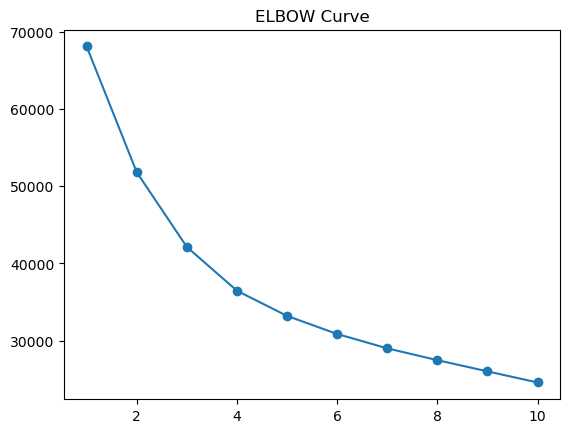

In [55]:
plt.plot(range(1,11),wcss,marker = 'o')
plt.title("ELBOW Curve")

In [56]:
# 3 clusters are good we , 
# will verify with silhouette too 

In [57]:
sil = []
for i in range(2,11):
    kmean = KMeans(n_clusters = i , n_init = 10)
    kmean.fit_predict(X)
    label = kmean.labels_

    sil.append(silhouette_score(X,label))

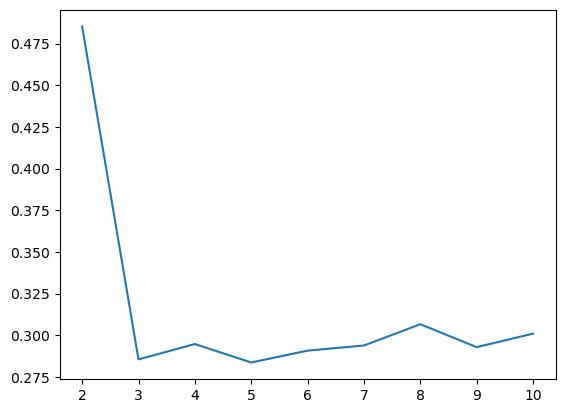

In [58]:
plt.plot(range(2,11),sil)

    even though the sil score is low for 3 clusters but we will still got will 3 , as it aligns to our domain knowledge and in real word data , it is how it works 

In [60]:
kmean = KMeans(n_clusters = 3 , random_state = 42 , n_init = 10)
kmean.fit(X)
label = kmean.labels_

In [61]:
tempD['furnishingType'] = label

In [62]:
tempD[tempD['furnishingType'] == 0].sample(5)

,AC,Bed,Chimney,Curtains,Dining Table,Exhaust Fan,Fan,Fridge,Geyser,Light,Microwave,Modular Kitchen,Sofa,Stove,TV,Wardrobe,Washing Machine,Water Purifier,furnishingType
542,12,3,1,1,1,1,10,1,5,20,1,1,0,1,0,5,1,1,0
764,8,8,0,0,0,0,8,1,0,10,0,0,1,1,8,8,0,1,0
3427,10,10,1,1,1,1,10,1,10,55,0,1,1,1,10,10,0,1,0
2074,7,0,1,1,0,1,7,1,5,10,1,1,0,1,0,5,1,1,0
749,4,4,1,1,1,1,5,1,4,10,1,1,0,1,0,4,1,1,0


In [63]:
tempD[tempD['furnishingType'] == 1].sample(5)

,AC,Bed,Chimney,Curtains,Dining Table,Exhaust Fan,Fan,Fridge,Geyser,Light,Microwave,Modular Kitchen,Sofa,Stove,TV,Wardrobe,Washing Machine,Water Purifier,furnishingType
3543,7,0,1,1,0,1,8,0,5,14,0,1,0,0,0,3,0,0,1
1946,5,0,1,1,1,1,0,0,3,5,1,1,0,0,0,4,0,0,1
1086,4,0,1,0,0,0,4,0,3,6,0,1,0,0,0,3,0,0,1
2643,11,0,1,1,1,1,8,0,5,14,1,1,0,0,0,5,0,0,1
757,5,0,1,1,0,1,8,0,0,10,0,1,0,0,0,3,0,0,1


In [64]:
tempD[tempD['furnishingType'] == 2].sample(5)

,AC,Bed,Chimney,Curtains,Dining Table,Exhaust Fan,Fan,Fridge,Geyser,Light,Microwave,Modular Kitchen,Sofa,Stove,TV,Wardrobe,Washing Machine,Water Purifier,furnishingType
339,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
634,0,0,0,0,1,0,10,0,5,40,0,0,0,0,0,0,0,0,2
2694,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,2
1680,7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
593,4,0,1,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,2


In [65]:
dt['furnishType'] = tempD['furnishingType']

In [66]:
dt.drop(columns = ['furnishDetails','index'] , inplace = True)

In [67]:
dt.sample(2)

,society,price,sector,pricePerSqft,propertyType,area,superbuilt,carpet,builtup,bedRooms,bathRooms,address,floorNum,facing,agePossesion,features,balcony,pooja room,servant room,study room,others,store room,furnishType
1651,ashiana anmol,1.9,sector 33,10698.2,flat,1776.0,1776.0,1154.4,1420.8,3.0,3.0,"Ashiana Anmol Sector-33 Sohna, Gurgaon",6.0,north-east,new property,"['Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Bank Attached Property', 'Piped-gas', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center', 'Water softening plant']",NaN,1,0,0,0,0,2
2928,"uppal southend, uppals southend, gurgaon",12.1,sector 49,484000.0,house,250.0,325.0,212.5,250.0,17.0,17.0,"uppal southend, uppals southend, gurgaon",4.0,north-east,new property,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",3+,0,1,0,1,0,1


# features 

In [69]:
dt[['features']].sample(5)

,features
314,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
3519,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
1156,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"
1761,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2089,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


In [70]:
dt['features'].isna().sum()

95

In [71]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3782 entries, 0 to 3781
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   society       3782 non-null   object 
 1   price         3781 non-null   float64
 2   sector        3782 non-null   object 
 3   pricePerSqft  3394 non-null   float64
 4   propertyType  3782 non-null   object 
 5   area          3394 non-null   float64
 6   superbuilt    3394 non-null   float64
 7   carpet        3394 non-null   float64
 8   builtup       3394 non-null   float64
 9   bedRooms      3782 non-null   float64
 10  bathRooms     3782 non-null   float64
 11  address       3782 non-null   object 
 12  floorNum      3767 non-null   float64
 13  facing        3782 non-null   object 
 14  agePossesion  3782 non-null   object 
 15  features      3687 non-null   object 
 16  balcony       1662 non-null   object 
 17  pooja room    3782 non-null   int64  
 18  servant room  3782 non-null 

In [72]:
# iguess we can drop those rows with null features casue it is very less 95 , 
# and we should be left with 3690 some rows , which are pretty descent  

In [73]:
dt = dt[~dt['features'].isna()]

In [74]:
dt.reset_index(drop = True , inplace = True)

In [75]:
dt['features'].isna().sum()

0

In [76]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   society       3687 non-null   object 
 1   price         3687 non-null   float64
 2   sector        3687 non-null   object 
 3   pricePerSqft  3330 non-null   float64
 4   propertyType  3687 non-null   object 
 5   area          3330 non-null   float64
 6   superbuilt    3330 non-null   float64
 7   carpet        3330 non-null   float64
 8   builtup       3330 non-null   float64
 9   bedRooms      3687 non-null   float64
 10  bathRooms     3687 non-null   float64
 11  address       3687 non-null   object 
 12  floorNum      3675 non-null   float64
 13  facing        3687 non-null   object 
 14  agePossesion  3687 non-null   object 
 15  features      3687 non-null   object 
 16  balcony       1567 non-null   object 
 17  pooja room    3687 non-null   int64  
 18  servant room  3687 non-null 

In [77]:
dt[['features']].sample(6)

,features
3604,"['Water Storage', 'Visitor Parking']"
2821,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', '0 open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
3412,"['Water Storage', 'Visitor Parking', 'Rain Water Harvesting']"
736,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'High Ceiling Height', 'False Ceiling Lighting', 'Water Storage', 'Recently Renovated', 'Visitor Parking', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']"
2511,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']"
293,"['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [78]:
# so we will create a dictionary of all the items , with luxury score of that out of 10 , 
# and we will each row thorugh that loop if it contained that item , 
# we will add its luxury score and then assign a final luxury score to the property 

In [79]:
luxury_num = {'24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar':8,
    'Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui':5,
    'Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre':8,
    'GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet':7,
    'wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden':9,
    'Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security':9,
    'Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga':7,
    'Meditation Area': 7
}

In [80]:
def lux_score(text):
    score = 0
    for key in luxury_num.keys():
        if key in text:
            score += luxury_num[key]
        else:
            pass

    return score

In [81]:
luxury_score = dt['features'].apply(lux_score)

In [82]:
luxury_score

0        58
1        77
2       131
3       198
4        37
5        88
6        99
7        13
8       221
9       199
10      199
11      103
12      110
13       87
14       77
15       39
16       39
17      190
18      107
19      207
20      190
21      104
22      207
23      176
24      207
25       40
26      207
27       59
28      194
29       84
30      180
31      185
32       89
33      214
34       99
35      207
36      221
37      146
38      155
39       63
40       61
41        6
42       63
43       49
44       40
45       39
46      199
47      106
48      199
49      182
50      182
51      197
52       85
53       45
54      201
55       63
56       69
57      203
58      155
59      198
60      136
61       94
62      153
63       35
64      110
65       80
66      179
67      142
68       63
69      146
70      221
71      153
72      172
73      169
74       28
75       63
76      151
77       39
78      221
79       88
80       93
81      204
82      190
83  

In [83]:
dt['luxuryScore'] = luxury_score

In [84]:
dt.drop(columns = 'features' , inplace = True)

In [85]:
dt.head()

,society,price,sector,pricePerSqft,propertyType,area,superbuilt,carpet,builtup,bedRooms,bathRooms,address,floorNum,facing,agePossesion,balcony,pooja room,servant room,study room,others,store room,furnishType,luxuryScore
0,"palam vihar, gurgaon",4.26,sector 1,24027.07,house,1773.0,2304.9,1507.05,1773.0,6.0,6.0,"palam vihar, gurgaon",3.0,north,relatively new property,3,0,0,0,0,0,1,58
1,m3m woodshire,1.70,sector 107,8749.36,flat,1943.0,1943.0,1262.95,1554.4,3.0,3.0,"M3M Woodshire Sector 107, Gurgaon",7.0,east,relatively new property,NaN,0,0,0,0,0,1,77
2,central park flower valley aqua front towers,2.50,sector 33,13974.29,flat,1789.0,1789.0,1162.85,1431.2,3.0,3.0,"Central Park Flower Valley Aqua Front Towers Sector-33 Sohna, Gurgaon",5.0,north,relatively new property,NaN,0,0,0,0,1,2,131
3,"sector 45, gurgaon",8.30,sector 45,44647.66,house,1859.0,2416.7,1580.15,1859.0,12.0,12.0,"sector 45, gurgaon",4.0,east,new property,3+,1,0,1,0,0,0,198
4,"nirvana country, gurgaon",10.40,sector 50,433333.33,house,240.0,312.0,204.00,240.0,4.0,4.0,"nirvana country, gurgaon",NaN,north-east,relatively new property,2,0,1,1,0,0,1,37


In [86]:
dt.to_csv('properties-cleaned-v2.csv', index = False)